In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df=pd.read_csv("Social_Network_Ads.csv")

In [94]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [95]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [97]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [98]:
df.shape

(400, 5)

In [99]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [100]:
df.drop("User ID",inplace=True, axis=1)

<Axes: >

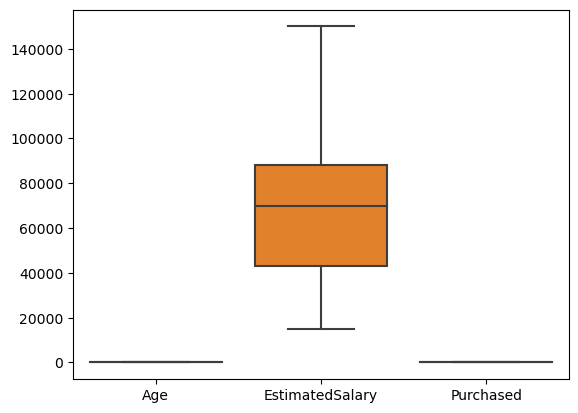

In [101]:
sns.boxplot(data=df)

In [102]:
df["EstimatedSalary"]=(df["EstimatedSalary"]-df["EstimatedSalary"].min())/(df["EstimatedSalary"].max()-df["EstimatedSalary"].min())

In [103]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,0.029630,0
1,Male,35,0.037037,0
2,Female,26,0.207407,0
3,Female,27,0.311111,0
4,Male,19,0.451852,0
...,...,...,...,...
395,Female,46,0.192593,1
396,Male,51,0.059259,1
397,Female,50,0.037037,1
398,Male,36,0.133333,0


In [104]:
df.loc[df["Gender"]=="Male","Gender"]=0
df.loc[df["Gender"]=="Female","Gender"]=1
df=df.astype({"Gender":"int"})

In [105]:
df.dtypes

Gender               int64
Age                  int64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [106]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [107]:
from sklearn.model_selection import train_test_split
x=df[['Gender', 'Age', 'EstimatedSalary']]
y=df['Purchased']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [108]:
x.shape

(400, 3)

In [109]:
y.shape

(400,)

In [110]:
x_train

,Gender,Age,EstimatedSalary
92,0,26,0.000000
223,0,60,0.644444
234,1,38,0.718519
232,0,40,0.681481
377,1,42,0.281481
...,...,...,...
323,1,48,0.111111
192,0,29,0.207407
117,0,36,0.274074
47,1,27,0.288889


In [111]:
x_test

,Gender,Age,EstimatedSalary
132,0,30,0.533333
309,1,38,0.259259
341,0,35,0.444444
196,1,30,0.474074
246,1,35,0.259259
...,...,...,...
216,0,49,0.370370
259,1,45,0.859259
49,1,31,0.548148
238,1,46,0.496296


In [112]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [113]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

In [114]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [115]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [116]:
model.score(x_train,y_train)

0.8392857142857143

In [117]:
model.score(x_test,y_test)

0.8833333333333333

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
print(confusion_matrix.__doc__)

Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If ``None`` is given, those that appear at least once
        in ``y

In [120]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [121]:
tn,fp,fn,tp

(75, 4, 10, 31)

In [122]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
error_rate=1-accuracy
precison=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*recall*precison)/(recall+precison)

In [123]:
print("Accuracy=",accuracy)
print("Error Rate=",error_rate)
print("Precison=",precison)
print("Recall=",recall)
print("F1 Score=",f1_score)

Accuracy= 0.8833333333333333
Error Rate= 0.1166666666666667
Precison= 0.8857142857142857
Recall= 0.7560975609756098
F1 Score= 0.8157894736842105


In [124]:
cm=confusion_matrix(y_test,y_pred)

In [125]:
cm

array([[75,  4],
       [10, 31]])

In [126]:
cm[0][0],cm[0][1],cm[1][0],cm[1][1]

(75, 4, 10, 31)

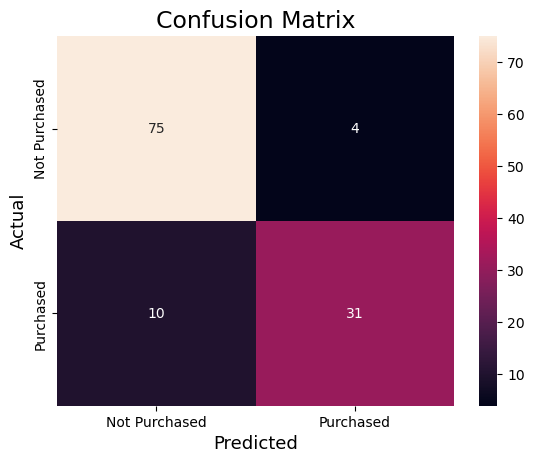

In [127]:
sns.heatmap(cm,annot=True,xticklabels=["Not Purchased","Purchased"],yticklabels=["Not Purchased","Purchased"])
plt.xlabel("Predicted",fontsize=13)
plt.ylabel("Actual",fontsize=13)
plt.title("Confusion Matrix",fontsize=17)
plt.show()